In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns

In [7]:
api_data = pd.read_csv("./data/api_data.csv")
hyperlink_data = pd.read_csv("./data/hyperlink_data.csv")

In [49]:
hyperlink_data[hyperlink_data["stop_reason"] != 'reached_philosophy']


,run_id,steps_total,page_title,page_url,stop_reason,links_away
776,51,4,"Simariya, Panna","https://en.wikipedia.org/wiki/Simariya,_Panna",loop,NaN
777,51,4,Tehsil,https://en.wikipedia.org/wiki/Tehsil,loop,NaN
778,51,4,List of mandals in Andhra Pradesh,https://en.wikipedia.org/wiki/List_of_mandals_...,loop,NaN
779,51,4,Mandal,https://en.wikipedia.org/wiki/Mandal,loop,NaN
780,51,4,List of mandals in Andhra Pradesh,https://en.wikipedia.org/wiki/List_of_mandals_...,loop,NaN
...,...,...,...,...,...,...
15180,964,2,The Accidental Caregiver,https://en.wikipedia.org/wiki/The_Accidental_C...,loop,NaN
15231,968,3,Mus%C3%A9e de Radio France,https://en.wikipedia.org/wiki/Mus%C3%A9e_de_Ra...,loop,NaN
15232,968,3,Radio France,https://en.wikipedia.org/wiki/Radio_France,loop,NaN
15233,968,3,Maison de la Radio et de la Musique,https://en.wikipedia.org/wiki/Maison_de_la_Rad...,loop,NaN


In [56]:
complete_runs = hyperlink_data[hyperlink_data["stop_reason"] == 'reached_philosophy']
complete_runs


,run_id,steps_total,page_title,page_url,stop_reason,links_away
0,1,18,Manchester Evening Chronicle,https://en.wikipedia.org/wiki/Manchester_Eveni...,reached_philosophy,18.0
1,1,18,"Sir Edward Hulton, 1st Baronet",https://en.wikipedia.org/wiki/Sir_Edward_Hulto...,reached_philosophy,17.0
2,1,18,British people,https://en.wikipedia.org/wiki/British_people,reached_philosophy,16.0
3,1,18,British Overseas Territories,https://en.wikipedia.org/wiki/British_Overseas...,reached_philosophy,15.0
4,1,18,Dependent territory,https://en.wikipedia.org/wiki/Dependent_territory,reached_philosophy,14.0
...,...,...,...,...,...,...
15265,970,16,Hypotheses,https://en.wikipedia.org/wiki/Hypotheses,reached_philosophy,4.0
15266,970,16,Explanation,https://en.wikipedia.org/wiki/Explanation,reached_philosophy,3.0
15267,970,16,Statement (logic),https://en.wikipedia.org/wiki/Statement_(logic),reached_philosophy,2.0
15268,970,16,Philosophy of language,https://en.wikipedia.org/wiki/Philosophy_of_la...,reached_philosophy,1.0


In [61]:
api_data_filtered = api_data.drop(columns=["page_url", "run_id"])
complete_runs = hyperlink_data[hyperlink_data["stop_reason"] == 'reached_philosophy']
complete_runs.merge(api_data_filtered, on="page_title", how="left")

,run_id,steps_total,page_title,page_url,stop_reason,links_away,length_bytes,links_count,created_ts,views_30d,vital_level
0,1,18,Manchester Evening Chronicle,https://en.wikipedia.org/wiki/Manchester_Eveni...,reached_philosophy,18.0,7057.0,168.0,2011-09-22T11:27:44Z,75.0,NaN
1,1,18,"Sir Edward Hulton, 1st Baronet",https://en.wikipedia.org/wiki/Sir_Edward_Hulto...,reached_philosophy,17.0,NaN,NaN,NaN,NaN,NaN
2,1,18,British people,https://en.wikipedia.org/wiki/British_people,reached_philosophy,16.0,196058.0,1022.0,2002-04-21T11:36:49Z,18275.0,NaN
3,1,18,British Overseas Territories,https://en.wikipedia.org/wiki/British_Overseas...,reached_philosophy,15.0,114010.0,828.0,2003-04-07T22:14:56Z,53930.0,5.0
4,1,18,Dependent territory,https://en.wikipedia.org/wiki/Dependent_territory,reached_philosophy,14.0,60534.0,1019.0,2003-04-22T09:36:57Z,14773.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
16571,970,16,Hypotheses,https://en.wikipedia.org/wiki/Hypotheses,reached_philosophy,4.0,NaN,NaN,NaN,NaN,NaN
16572,970,16,Explanation,https://en.wikipedia.org/wiki/Explanation,reached_philosophy,3.0,9406.0,80.0,2003-04-25T18:56:16Z,18090.0,NaN
16573,970,16,Statement (logic),https://en.wikipedia.org/wiki/Statement_(logic),reached_philosophy,2.0,NaN,NaN,NaN,NaN,NaN
16574,970,16,Philosophy of language,https://en.wikipedia.org/wiki/Philosophy_of_la...,reached_philosophy,1.0,70385.0,926.0,2001-06-04T01:56:33Z,44537.0,4.0


In [38]:
hyperlink_data[hyperlink_data["page_title"] == "Philosophy"]

,run_id,steps_total,page_title,page_url,stop_reason,links_away
18,1,18,Philosophy,https://en.wikipedia.org/wiki/Philosophy,reached_philosophy,0.0
41,2,22,Philosophy,https://en.wikipedia.org/wiki/Philosophy,reached_philosophy,0.0
61,3,19,Philosophy,https://en.wikipedia.org/wiki/Philosophy,reached_philosophy,0.0
84,4,22,Philosophy,https://en.wikipedia.org/wiki/Philosophy,reached_philosophy,0.0
147,8,17,Philosophy,https://en.wikipedia.org/wiki/Philosophy,reached_philosophy,0.0
...,...,...,...,...,...,...
15131,961,18,Philosophy,https://en.wikipedia.org/wiki/Philosophy,reached_philosophy,0.0
15154,962,22,Philosophy,https://en.wikipedia.org/wiki/Philosophy,reached_philosophy,0.0
15193,965,12,Philosophy,https://en.wikipedia.org/wiki/Philosophy,reached_philosophy,0.0
15230,967,21,Philosophy,https://en.wikipedia.org/wiki/Philosophy,reached_philosophy,0.0


# On average, how long does it take to reach philosophy?

In [17]:
# Takes the total amount of steps 
filtered = hyperlink_data[hyperlink_data["stop_reason"] == "reached_philosophy"]
steps_per_run = filtered.groupby("run_id", as_index=False)["steps_total"].first()

In [26]:
steps_per_run

,run_id,steps_total
0,1,18
1,2,22
2,3,19
3,4,22
4,5,12
...,...,...
925,965,12
926,966,14
927,967,21
928,969,17


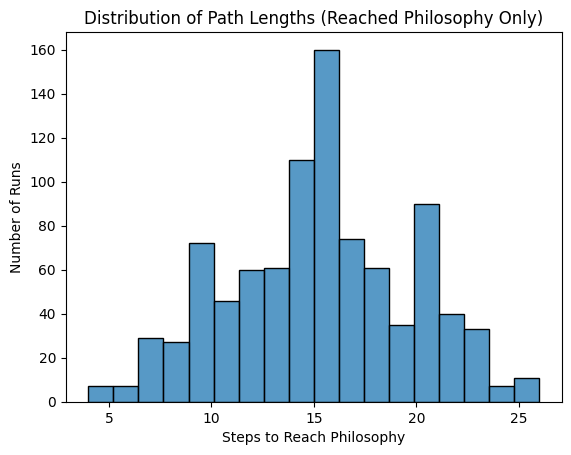

In [29]:
sns.histplot(
    data=steps_per_run,
    x='steps_total'
)
plt.xlabel("Steps to Reach Wikipedia's Philosophy Article")
plt.ylabel("Number of Runs")
plt.title("Distribution of Path Lengths")
plt.show()

# Cleaning Data

In [46]:
filtered["page_title_normalized"] = filtered["page_title"].replace({
    "Philosophical": "Philosophy"
})
# Since Philosophy and Philosophical redirect to the same page, we need to combine them.
common_pages = (
    filtered.groupby("page_title_normalized")
    .size()
    .reset_index(name="count")
)


common_pages.sort_values("count", ascending=False)

/var/folders/l6/y87nw2gx5vbbxz6dv1mplr2h0000gn/T/ipykernel_47048/3241729401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["page_title_normalized"] = filtered["page_title"].replace({


,page_title_normalized,count
2123,Philosophy,930
2125,Philosophy of language,307
2310,Rationalism,297
1760,Mathematical theory,294
1761,Mathematics,294
...,...,...
1134,"Glendora, California",1
1135,Global network,1
1137,Go (game),1
1138,Go professional,1


,run_id,steps_total,page_url,stop_reason,links_away
page_title,,,,,
%C3%85ke Borg,1,1,1,1,1
%C3%89comus%C3%A9e d%27Alsace,1,1,1,1,1
%C3%89mile Cornic,1,1,1,1,1
%C3%89p%C3%A9e,1,1,1,1,1
%C3%8Dker Fern%C3%A1ndez,1,1,1,1,1
...,...,...,...,...,...
"Zebulon, North Carolina",1,1,1,1,1
Zeppelin LZ22,1,1,1,1,1
Zhu Mingxin,1,1,1,1,1
